<a href="https://colab.research.google.com/github/garylau1/model_training/blob/main/graph_explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step by Step graph neural network:

In this project we would do a simple example to embed the notes step by step.

I would explain some of the codes in details.

We firstly make a graph to demonstrate how it works:

In [2]:
import networkx as nx

In [28]:
G = nx.Graph()
print(G.graph)
G.add_node(0, feature=10, label=0)   #add 10 features for nodes 0
G.add_nodes_from([
  (1, {"feature": 3, "label": 1}),      # add node1 with :3 features,label 1 into node 1 and  node 2: 5 features and label 2
  (2, {"feature": 5, "label": 2})
]) #(node, attrdict)

G.nodes(data=True)
G.add_edge(0, 2, weight=0.8)   #add the edge between 0 and 2
edge_0_1_attr = G.edges[(0, 2)]
print ("edge of G",G.edges)

{}
edge of G [(0, 2)]


In [31]:
G.add_edges_from([(1,2,{"weight1":0.3}),(1,0,{"weight2":0.4})]) #add more edges

for i in G.edges(data=True):
  print (i)
print (G.number_of_edges())

(0, 2, {'weight': 0.8})
(0, 1, {'weight2': 0.4})
(1, 2, {'weight1': 0.3})
3


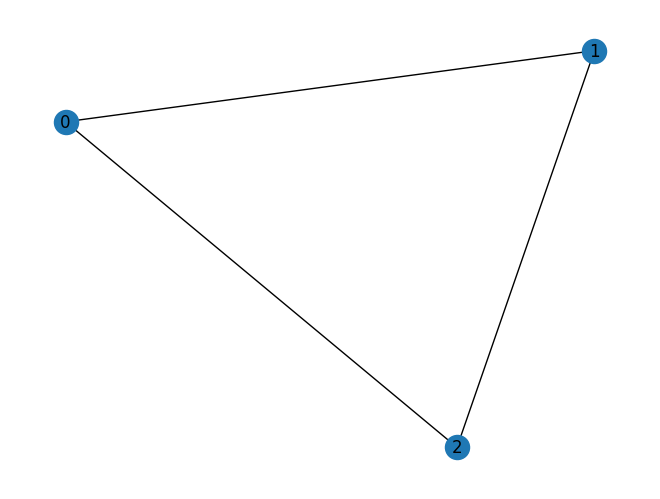

In [32]:
nx.draw(G,with_labels=True) #we can draw it

In [7]:
nx.pagerank(G, alpha=1.1)  #we can see the importance of the nodes to other nodes are equal in this cases

{0: 0.3206899043548301, 1: 0.3586201912903381, 2: 0.3206899043548301}

In [8]:
for i in range(len(G)):
  print ("Node{} has degree{}".format(i,G.degree[i]))   #as a result they have the same degree(the same edges)

Node0 has degree2
Node1 has degree2
Node2 has degree2


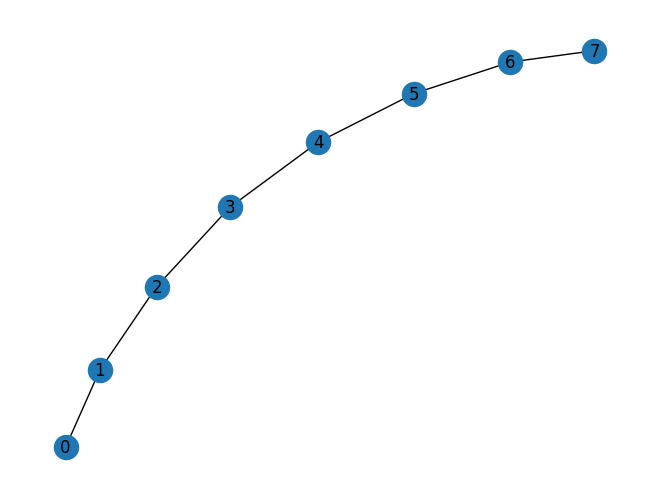

In [9]:
W = nx.path_graph(8)
nx.draw(W,with_labels=True)   #draw other linear graph with 8 nodes


In [33]:
total=0
for i in nx.pagerank(G, alpha=0.3).keys():       #We can see sum of the nx.pagerank value for each node are equal to 1
  total=total+nx.pagerank(G, alpha=0.9)[i]

total

1.0000000000000002

In [34]:
import torch

!pip install -q torch-geometric


In this section we review some of the matplotlib codes and we use in our example:

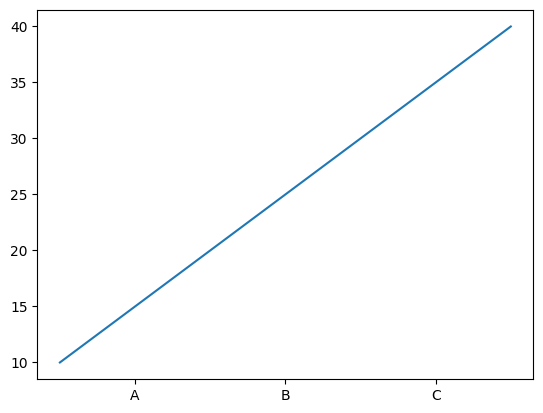

In [14]:
#we use matplotlib and show the example of plotting with xticks

%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample plot
plt.plot([1, 2, 3, 4], [10, 20, 30, 40])

# Set x-axis ticks at specific positions with custom labels
plt.xticks([1.5, 2.5, 3.5], ['A', 'B', 'C'])

# Show the plot
plt.show()

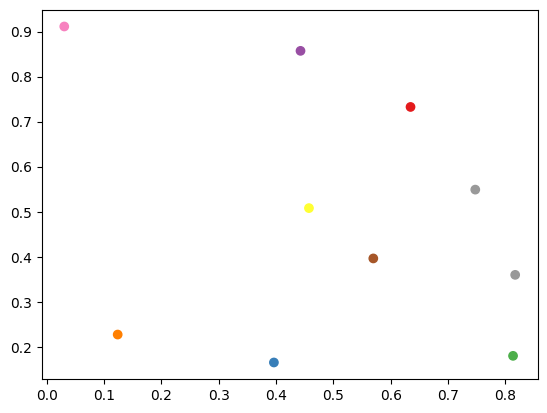

In [52]:
import matplotlib.pyplot as plt
import numpy as np     #we demonstrate the scatter plot with order

x = np.random.rand(10)
y = np.random.rand(10)
z = np.arange(10)
#z=['red', 'green', 'blue'] * 33
plt.scatter(x,y, c=z, cmap='Set1')
plt.show()

#it is repeated as there are 9 type of colour in Set 1 and we give 10 points

In [53]:
x,y,z

#you can see it is in order stated in the website : the first point in array is red and the second point is blue ....
#https://matplotlib.org/stable/users/explain/colors/colormaps.html

(array([0.63444739, 0.3961612 , 0.81324752, 0.44255338, 0.12367558,
        0.45730275, 0.5695239 , 0.03051523, 0.74737697, 0.81697055]),
 array([0.73262821, 0.16519149, 0.17991843, 0.8571852 , 0.22721187,
        0.50800874, 0.39623263, 0.91132283, 0.54905028, 0.35977268]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

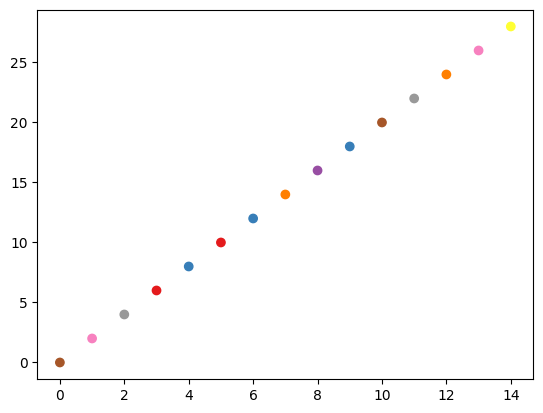

In [69]:
x = np.arange(0,15)
y = np.arange(0,30,2)
z = np.random.rand(15)
#z=np.arange(1,16)
plt.scatter(x,y, c=z, cmap='Set1')
plt.show()



In [70]:
#in z: we can see red and blue colours(3rd,4th,5th,6th) are the 1st and second one in the qualitive map since they have smallest value in z.

#grey colour has the highest value 0.99 in the colour map

#https://matplotlib.org/stable/users/explain/colors/colormaps.html

array([0.73932853, 0.83273567, 0.99665886, 0.01808104, 0.21763655,
       0.02902575, 0.19170349, 0.55911582, 0.40216679, 0.20962108,
       0.77815651, 0.99028295, 0.46687893, 0.81254143, 0.62487836])

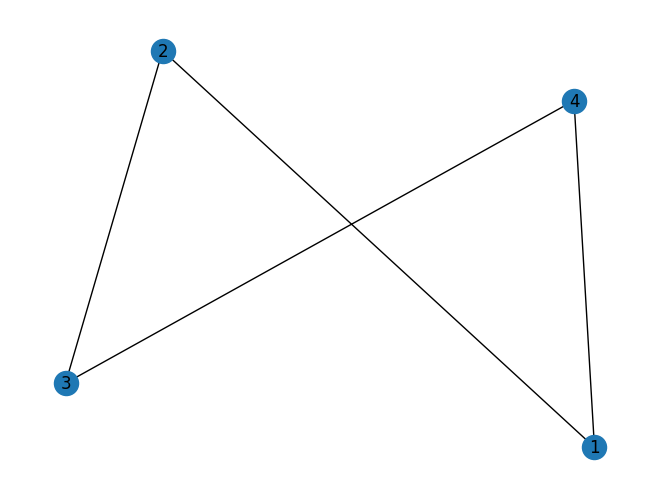

In [73]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a simple graph again
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

# Calculate node positions using spring layout
pos = nx.spring_layout(G, seed=100)    #the distribution of nodes of the setting are fix with seed=100

# Draw the graph
nx.draw(G,pos=pos, with_labels=True)
plt.show()

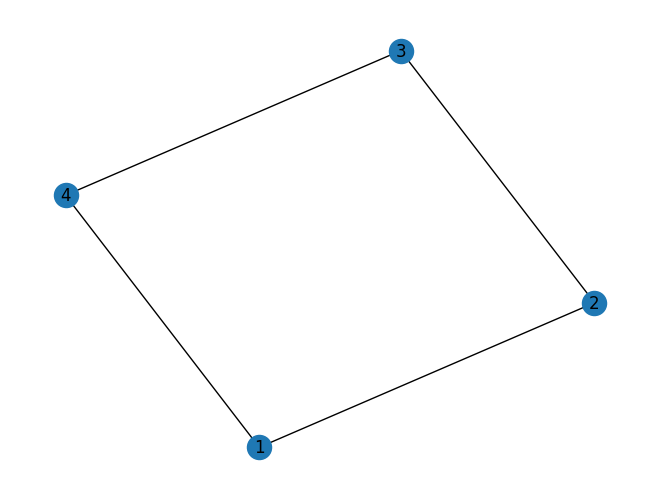

In [74]:
pos = nx.spring_layout(G, seed=99)    #different seed of the spring_layout with the same graph G has different plot
nx.draw(G,pos=pos, with_labels=True)
plt.show()

Now We create a function with mathplotlib for the graph:


- We use detach as we need to turn torch tensor object(h) into a mode that we dont keep track of the gradients. We also need to convert into numpy object to diplay it.

- xticks and yticks are empty implied we dont need (we have review of xticks above)

- we have plot.scatter(list of points in x axis,list of points in y axis ,size of the points,the colour index of the colour map,colur map we choose )

- loss.item() means we extract the intreger from the loss(which is tensor object).

In [54]:
def graph_plot(h,color,epoch=None,loss=None,accuracy=None):
  plt.figure(figsize=(10,10))
  plt.xticks([])
  plt.yticks([])

  if torch.is_tensor(h):
    h=h.detach().cpu().numpy()

    plt.scatter(h[:0],h[:1],s=130,c=color,cmap="Set1")
    if epoch is not None and loss is not None and accuracy['train'] is not None and accuracy['val'] is not None:
            plt.xlabel((f'Epoch: {epoch}, Loss: {loss.item():.4f} \n'
                       f'Training Accuracy: {accuracy["train"]*100:.2f}% \n'
                       f' Validation Accuracy: {accuracy["val"]*100:.2f}%'),
                       fontsize=16)



  else:
    nx.draw_networkx(h, pos=nx.spring_layout(h, seed=42), with_labels=False,   #we have the nx.spring_layour as well/
                         node_color=color, cmap="Set1")
    plt.show()

Next we start to explore our dataset KarateClub:

In [75]:
from torch_geometric.datasets import KarateClub

dataset=KarateClub()

print (f"Our dataset has len {len(dataset)}\n" f"and number of feature:{dataset.num_features}\n" f"and number of class:{dataset.num_classes}\n" )


Our dataset has len 1
and number of feature:34
and number of class:4



In [80]:
data=(dataset[0])
type(dataset),(type(dataset[0]))
#we need the instance data from the class torch_geometric

(torch_geometric.datasets.karate.KarateClub, torch_geometric.data.data.Data)

In [82]:
len(data.edge_index.T),print(data.edge_index) #we print the number of the edges and the nodes of this graph

#we can see the first element of the first row is linked into the first element of the second row (0 to 1 ,0 to 2....)
#The edges can be understood in such way

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28, 32,  0,
          1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5, 16,  0,  1,
          2,  3,  0,  2, 30, 32, 33,  2, 33,  0,  4

(156, None)

In [84]:
   #make it clearly by printing out the first 10 pairs of edges
print(data.edge_index.t()[0:10])

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11]])


In [91]:
data.x,(data.y)  #print out the position of the data e.g [1., 0., 0.,  ..., 0., 0., 0.] mean the node is in the first position
#we have the label of this data as well(There are 4 classes).

(tensor([[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]]),
 tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
         2, 2, 0, 0, 2, 0, 0, 2, 0, 0]))

In [99]:
data  #we have four object in the this data

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


AttributeError: 'GlobalStorage' object has no attribute 'is_multigraph'

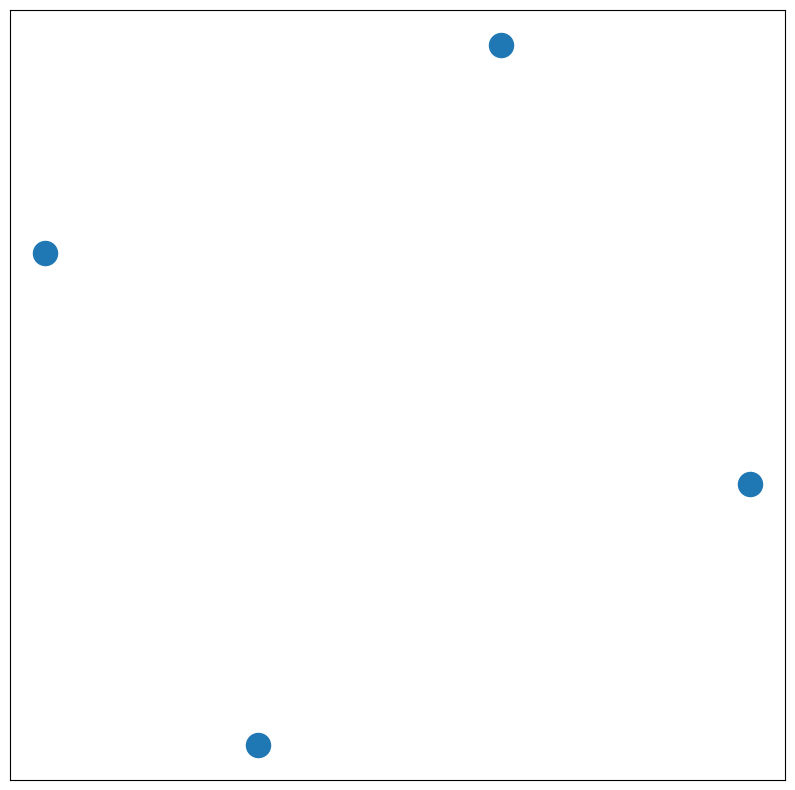

In [98]:
graph_plot(data,color=None)


# However, the GlobalStorage class or object does not have this attribute defined.
#We are not assumed to plot like this since nx.draw_networkx in the function only accepted graph object.
#next we need to convert back data into a graph object


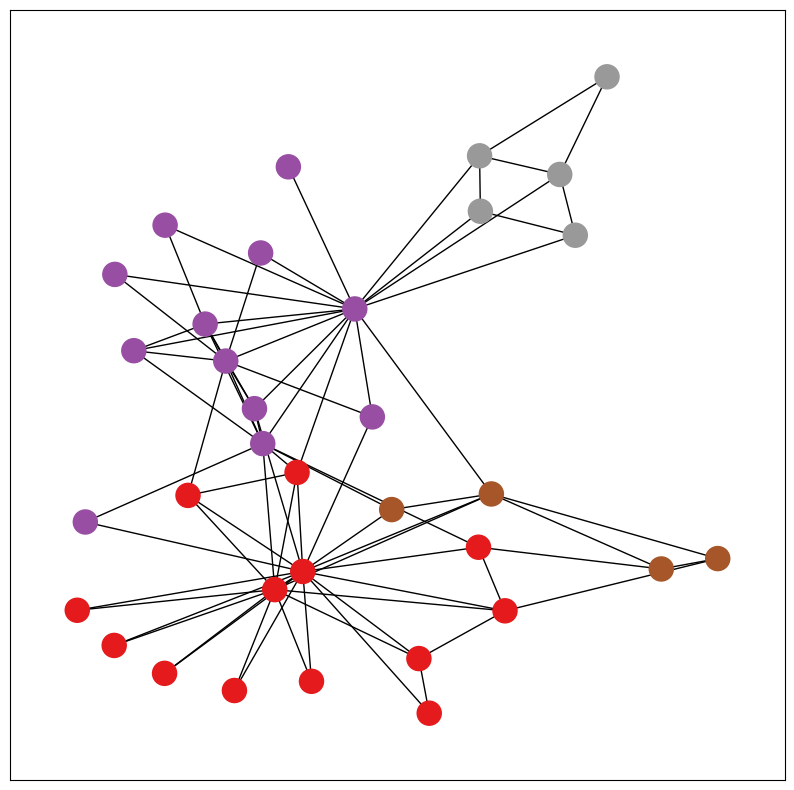

In [106]:
from torch_geometric.utils import to_networkx
#turn into graph object called Data
Data= to_networkx(data, to_undirected=True)
Data

graph_plot(Data,color=data.y)

In [111]:
2*Data.number_of_edges(),Data.number_of_nodes(),round(2*Data.number_of_edges()/Data.number_of_nodes()),nx.average_clustering(Data)

#number of edges,number of node and average number of degrees,avergae_clustering (to count who closed of each nodes in graph)
#we need to mutiply by 2 as this Data has only edges in one direction e.g it counts (0,1) but didnt count (1,0)

#the avergae_clustering is 0.57 which means it is sligher closer to each others

(156, 34, 5, 0.5706384782076823)

Node embedding:

We will start from Pytorch tensor

In [116]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



In [122]:

edge_list=data.edge_index.t()  #we need a list of edges


In [127]:
# We created a embedding. Suppose we have 5 nodes and each nodes has embedding of 3:

embedding=nn.Embedding(num_embeddings=5, embedding_dim=3)

for i in range(4):
  print (embedding(torch.tensor([i,i+1])))  #we print out the embedding for i and i+1 rows

print (embedding(torch.tensor([0,1,2])))
#we print out the first ,second and third rows of the embedding.

tensor([[0.5364, 1.0265, 0.6823],
        [2.1808, 0.2671, 0.7073]], grad_fn=<EmbeddingBackward0>)
tensor([[ 2.1808,  0.2671,  0.7073],
        [-0.1270,  1.0431, -0.6486]], grad_fn=<EmbeddingBackward0>)
tensor([[-0.1270,  1.0431, -0.6486],
        [-0.3203,  0.7256, -0.7207]], grad_fn=<EmbeddingBackward0>)
tensor([[-0.3203,  0.7256, -0.7207],
        [ 1.1853,  1.7458,  0.6833]], grad_fn=<EmbeddingBackward0>)
tensor([[ 0.5364,  1.0265,  0.6823],
        [ 2.1808,  0.2671,  0.7073],
        [-0.1270,  1.0431, -0.6486]], grad_fn=<EmbeddingBackward0>)


In [128]:
embedding.weight,embedding.weight.data   #this is the weight and the data (without gradient tracking)

(Parameter containing:
 tensor([[ 0.5364,  1.0265,  0.6823],
         [ 2.1808,  0.2671,  0.7073],
         [-0.1270,  1.0431, -0.6486],
         [-0.3203,  0.7256, -0.7207],
         [ 1.1853,  1.7458,  0.6833]], requires_grad=True),
 tensor([[ 0.5364,  1.0265,  0.6823],
         [ 2.1808,  0.2671,  0.7073],
         [-0.1270,  1.0431, -0.6486],
         [-0.3203,  0.7256, -0.7207],
         [ 1.1853,  1.7458,  0.6833]]))

In [130]:
def embedding_creation(num_node=34,embedding_dim=4):
  embedding=nn.Embedding(num_node,embedding_dim)
  embedding.weight.data.uniform_(0, 1)   #we want to restart the values between 0 and 1 inside the embedding
  return embedding

embedding_new = embedding_creation()

In [131]:
embedding_new(torch.tensor([1,3,5,7])) #print the embedding of these nodesdata.x,data.y

tensor([[0.4958, 0.2899, 0.5501, 0.1666],
        [0.6579, 0.0627, 0.7928, 0.8816],
        [0.8448, 0.9344, 0.3685, 0.6467],
        [0.7516, 0.2651, 0.3260, 0.5160]], grad_fn=<EmbeddingBackward0>)

In [145]:
#we recreate the graph for simplicity
G = nx.karate_club_graph()

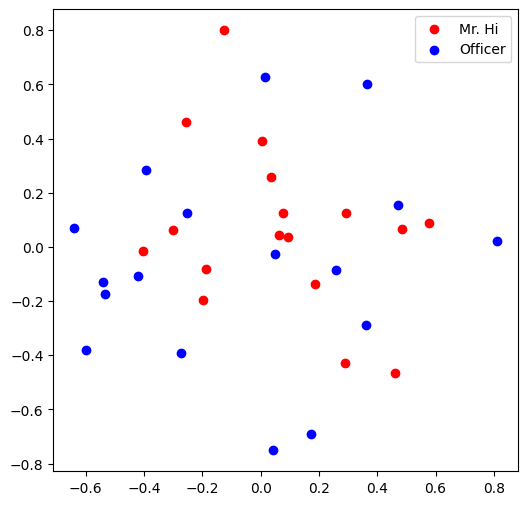

In [147]:
from sklearn.decomposition import PCA
##Principal component analysis (PCA) reduces the number of dimensions
#in large datasets to principal components that retain most of the original information.
#for more reference:
##https://www.kdnuggets.com/2023/05/principal-component-analysis-pca-scikitlearn.html

#https://builtin.com/data-science/step-step-explanation-principal-component-analysis#:~:text=PCA%20reduces%20the%20number%20of,avoid%20overfitting%20in%20a%20model.
def visualize_emb(emb,G=G):
  X = emb.weight.data.numpy()    # we need the embedding vectors for all 34 rows (nodes)
  pca = PCA(n_components=2)
  components = pca.fit_transform(X) #transform it using vector caluclus and linear algebra ways
  plt.figure(figsize=(6, 6))
  club1_x = []  #store list of the points(embedding) in x axis for Mr.Hi club
  club1_y = []  #store list of the points in y axis for Mr.Hi club
  club2_x = []  #store list of the points in x axis for Officer club
  club2_y = []  #store list of the points in y axis for Officer club
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi': #add the transformed_embedding (with two dimension) in X we create
      #node[0] is the node number,node[1] is the dictionary of club as key
      club1_x.append(components[node[0]][0])   #this is the x component of the embedding components[node number]
      club1_y.append(components[node[0]][1])   #this is the y component of the embedding components[node number]
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Visualize the initial random embeddding
visualize_emb(embedding_new)

In [155]:
G.has_edge(8,17)  #we can check whether it has the edged(8,17)

False

In [153]:
# After converting the PyTorch Geometric graph to NetworkX
print(G.nodes(data=True))  # Prints nodes with their attributes
print(G.edges(data=True))  # Prints edges with their attributes

[(0, {'club': 'Mr. Hi'}), (1, {'club': 'Mr. Hi'}), (2, {'club': 'Mr. Hi'}), (3, {'club': 'Mr. Hi'}), (4, {'club': 'Mr. Hi'}), (5, {'club': 'Mr. Hi'}), (6, {'club': 'Mr. Hi'}), (7, {'club': 'Mr. Hi'}), (8, {'club': 'Mr. Hi'}), (9, {'club': 'Officer'}), (10, {'club': 'Mr. Hi'}), (11, {'club': 'Mr. Hi'}), (12, {'club': 'Mr. Hi'}), (13, {'club': 'Mr. Hi'}), (14, {'club': 'Officer'}), (15, {'club': 'Officer'}), (16, {'club': 'Mr. Hi'}), (17, {'club': 'Mr. Hi'}), (18, {'club': 'Officer'}), (19, {'club': 'Mr. Hi'}), (20, {'club': 'Officer'}), (21, {'club': 'Mr. Hi'}), (22, {'club': 'Officer'}), (23, {'club': 'Officer'}), (24, {'club': 'Officer'}), (25, {'club': 'Officer'}), (26, {'club': 'Officer'}), (27, {'club': 'Officer'}), (28, {'club': 'Officer'}), (29, {'club': 'Officer'}), (30, {'club': 'Officer'}), (31, {'club': 'Officer'}), (32, {'club': 'Officer'}), (33, {'club': 'Officer'})]
[(0, 1, {'weight': 4}), (0, 2, {'weight': 5}), (0, 3, {'weight': 3}), (0, 4, {'weight': 3}), (0, 5, {'weight

In [157]:
G.has_edge(0,1),G.has_edge(1,0)  #we can also check it exists when the order reversed because this is undirected graph.


(True, True)

Now we need to train our embedding.However we need some non-existent edges (negative case) for use to do training.

In [168]:
from torch.optim import SGD
import torch.nn as nn
import random

def sample_negative_edges(G, num_neg_samples):
  # TODO: Implement the function that returns a list of negative edges.


  neg_edge_list = []

  # Get the set of all nodes in the graph
  all_nodes = set(G.nodes())

      # Iterate to sample negative edges
  while len(neg_edge_list) < num_neg_samples:
    # Randomly select two nodes
    node1, node2 = random.sample(list(all_nodes), 2)
    # Check if the selected edge doesn't exist in the graph
    if not G.has_edge(node1, node1) and not G.has_edge(node2, node1):
      #we need to check G.has_edge(node2, node1) as the above reason-see the code just above
      neg_edge_list.append((node1, node2)) #add this edge

  return torch.tensor(neg_edge_list)

# Sample 156 negative edges
neg_edge_list = sample_negative_edges(G, 2*len(G.edges))
pos_edge_list=edge_list  #we have positive pairs before
len(neg_edge_list),len(pos_edge_list)

(156, 156)

In [176]:
#next we need to create the label for this pairs of edge:

pos_label = torch.ones(len(pos_edge_list), )
neg_label = torch.zeros(len(pos_edge_list), )

train_label = torch.cat([pos_label, neg_label], dim=0)
train_label

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

In [203]:
train_edge = torch.cat([pos_edge_list.t(),neg_edge_list.t()], dim=1) #we combine two together in such way
train_edge,train_edge.shape

(tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
           1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
           3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
           7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
          13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
          21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
          27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
          31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
          33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,  7, 14, 30, 16, 15, 10,
           1, 12, 28, 22, 21, 30, 20, 14, 21, 10,  4, 17,  5, 24, 11, 20, 31,  5,
          31, 11,  2, 20, 25, 13, 28,  3, 14,  2, 25, 20, 24,  9,  6,  4, 19, 32,
          18,  6, 27, 20, 11, 18, 28, 11, 20,  9,  5, 22, 16,  9, 27,  1, 27, 14,
           7, 25

In [204]:
embedding_new(train_edge),embedding_new(train_edge).shape

# in our training process we will train our embedding by puting the nodes index


# node 0 in the list train_edge replacd by [0.6644, 0.6957, 0.4819, 0.9009],....node 28 is replaced by [0.5727, 0.0490, 0.8786, 0.4713]
#we have 4 embeeding dimention for each train_edge so the dimention from (2,323) to (2,232,4)

(tensor([[[0.6644, 0.6957, 0.4819, 0.9009],
          [0.6644, 0.6957, 0.4819, 0.9009],
          [0.6644, 0.6957, 0.4819, 0.9009],
          ...,
          [0.9364, 0.1552, 0.4863, 0.0673],
          [0.3765, 0.9243, 0.9152, 0.8179],
          [0.8061, 0.1384, 0.0736, 0.6375]],
 
         [[0.4958, 0.2899, 0.5501, 0.1666],
          [0.9545, 0.5996, 0.7346, 0.1056],
          [0.6579, 0.0627, 0.7928, 0.8816],
          ...,
          [0.9391, 0.7577, 0.5676, 0.3016],
          [0.9364, 0.1552, 0.4863, 0.0673],
          [0.5727, 0.0490, 0.8786, 0.4713]]], grad_fn=<EmbeddingBackward0>),
 torch.Size([2, 312, 4]))

In our training process we would increase the accuracy of the embedding of the pair of positive nodes (tend to label 1) and the pair of negative nodes(tend to label 0)

- We calulate the dot product in our training process
-  we seperate two into part (the node in the first part dot with the node in second part)
- For example,we have a embedding of positive node 0 dot embedding of positive node 1 => with label 1  , a embedding of negative node 18 dot embedding of negative node 28 _> with label0. (the last pair of our list of negative nodes)

- we would train until it has good accuracy.

In [220]:
embedding_new(train_edge)[0].mul(embedding_new(train_edge)[1]).sum(dim=1).shape
#mul - performs a elementwise multiplication with broadcasting

# We have the positive list torch.Size([312, 4]) dot with megative list torch.Size([312, 4])
#we need to sum the first dimention which has 4 elements e.g [0.6579, 0.0627, 0.7928, 0.8816]=> become one number => after sigmoid function
#it lied between 0 and 1 => we can increase the values into 1 for the pair of positive nodes and 0 for the negative pair of nodes.

torch.Size([312])

In [221]:
def accuracy(pred, label):
  # TODO: Implement the accuracy function. This function takes the
  # pred tensor (the resulting tensor after sigmoid) and the label
  # tensor (torch.LongTensor). Predicted value greater than 0.5 will
  # be classified as label 1. Else it will be classified as label 0.
  # The returned accuracy should be rounded to 4 decimal places.
  # For example, accuracy 0.82956 will be rounded to 0.8296.

  ############# Your code here ############
  pred_binary = (pred > 0.5).float()
  # Calculate accuracy
  accu = (pred_binary == label).float().mean().item()
  # Round the accuracy to 4 decimal places
  accu = round(accu, 4)
  #########################################

  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  # TODO: Train the embedding layer here. You can also change epochs and
  # learning rate. In general, you need to implement:
  # (1) Get the embeddings of the nodes in train_edge
  # (2) Dot product the embeddings between each node pair
  # (3) Feed the dot product result into sigmoid
  # (4) Feed the sigmoid output into the loss_fn
  # (5) Print both loss and accuracy of each epoch
  # (6) Update the embeddings using the loss and optimizer
  # (as a sanity check, the loss should decrease during training)

  epochs = 500
  learning_rate = 0.1

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  for i in range(epochs):

    ############# Your code here ############
    # Forward pass: Compute predicted y by passing x to the model
    emb_train = emb(train_edge)
    dot_product = emb_train[0].mul(emb_train[1]).sum(dim=1)   #Here is what we have done
    pred = sigmoid(dot_product)

    # Compute and print loss
    loss = loss_fn(pred, train_label)     #perform BCELoss(because it is binary number)
    accuracy_value = accuracy(pred, train_label)
    print(f"Epoch {i}: Loss: {loss.item()}, Accuracy: {accuracy_value}")

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()    #we need to reset it because we dont want to keep track of the gradient for each epoch.
    loss.backward()   #perform gradient caluclation
    optimizer.step()   #update the setp
    #########################################

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()


train(embedding_new, loss_fn, sigmoid, train_label, train_edge)

Epoch 0: Loss: 0.8682823181152344, Accuracy: 0.5
Epoch 1: Loss: 0.8667059540748596, Accuracy: 0.5
Epoch 2: Loss: 0.863734245300293, Accuracy: 0.5
Epoch 3: Loss: 0.8595483303070068, Accuracy: 0.5
Epoch 4: Loss: 0.854325532913208, Accuracy: 0.5
Epoch 5: Loss: 0.8482356071472168, Accuracy: 0.5
Epoch 6: Loss: 0.8414381146430969, Accuracy: 0.5
Epoch 7: Loss: 0.834080159664154, Accuracy: 0.5
Epoch 8: Loss: 0.8262962102890015, Accuracy: 0.5
Epoch 9: Loss: 0.8182066082954407, Accuracy: 0.5
Epoch 10: Loss: 0.8099181652069092, Accuracy: 0.5
Epoch 11: Loss: 0.8015241026878357, Accuracy: 0.5
Epoch 12: Loss: 0.7931045889854431, Accuracy: 0.5
Epoch 13: Loss: 0.7847277522087097, Accuracy: 0.5
Epoch 14: Loss: 0.776450514793396, Accuracy: 0.5
Epoch 15: Loss: 0.7683195471763611, Accuracy: 0.5032
Epoch 16: Loss: 0.7603720426559448, Accuracy: 0.5064
Epoch 17: Loss: 0.7526374459266663, Accuracy: 0.5064
Epoch 18: Loss: 0.7451375722885132, Accuracy: 0.5096
Epoch 19: Loss: 0.7378883361816406, Accuracy: 0.5096

- We see it starts overfitting after epoches 400.
- The result is nice since we have few datas only.

-- But we can see the embedding are in correct cluster now.

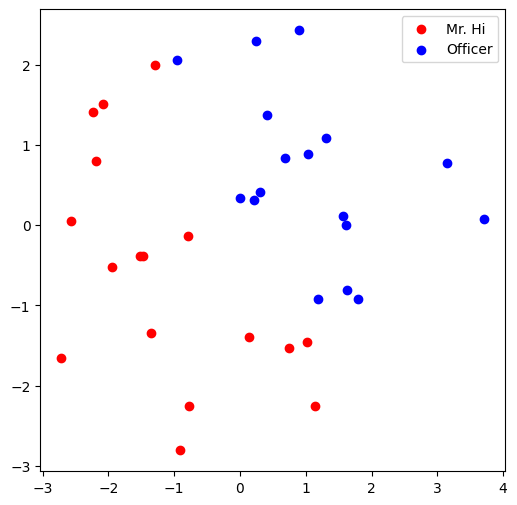

In [223]:
visualize_emb(embedding_new)

In [225]:
embedding_new.parameters()  #embedding itself is a layer in torch that can be trained during the times.

<generator object Module.parameters at 0x7f2863c14900>